In [216]:
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img
# from keras.preprocessing.image import ImageDataGenerator, load_ig, img_to_array
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
%matplotlib inline

In [217]:
data_dir = Path("Dataset/Curve_NoCurve_Dataset/Curve_NoCurve_Dataset/")

train_data_curve = data_dir/"train/curve"
train_data_nocurve = data_dir/"train/no_curve"
    
test_data_curve = data_dir/"test/curve"
test_data_nocurve = data_dir/"test/no_curve"

In [218]:
def train_data_with_label(pathh):
    train_images = []
    
    for i in tqdm(os.listdir(pathh)):
        path = os.path.join(pathh, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, 256, 256)
        train_images.append([np.array(img)])
        
    shuffle(train_images)
    return train_images

In [219]:
def test_data_with_label(pathh):
    test_images = []
    
    for i in tqdm(os.listdir(pathh)):
        path = os.path.join(pathh, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, 256, 256)
        test_images.append([np.array(img)])

    return test_images

In [220]:
## Training Images
train_images1 = train_data_with_label(train_data_curve)
train_images2 = train_data_with_label(train_data_nocurve)
train_image = np.append(train_images1, train_images2)
train_image = train_image.reshape(-1,256, 256, 1)

## Training Labels
label1 = np.ones(len(train_images1),dtype=np.int8) 
label2 = np.zeros(len(train_images2), dtype=np.int8)
train_label = np.append(label1, label2)

## Shuffling Dataset
c = list(zip(train_image, train_label))
shuffle(c)
train_image , train_label = zip(*c)
train_image = np.asarray(train_image)
train_label = np.asarray(train_label)

## Testing Images
test_images1 = test_data_with_label(test_data_curve)
test_images2 = test_data_with_label(test_data_nocurve)
test_image = np.append(test_images1, test_images2)
test_image = test_image.reshape(-1, 256, 256, 1)

## Testing Labels
label1 = np.ones(len(test_images1),dtype=np.int8) 
label2 = np.zeros(len(test_images2), dtype=np.int8)
test_label = np.append(label1, label2)

## Shuffling Dataset
d = list(zip(test_image, test_label))
shuffle(d)
test_image, test_label = zip(*d)
test_image = np.asarray(test_image)
test_label = np.asarray(test_label)

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1041.66it/s]


## One-Hot-Encoding Labels

In [221]:
trl = np.zeros((train_label.size, train_label.max() +1 ))
trl[np.arange(train_label.size), train_label] = 1 
train_label = trl

tel = np.zeros((test_label.size, test_label.max() + 1))
tel[np.arange(test_label.size), test_label] = 1
test_label = tel

In [195]:
print(trl)
print(tel)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [196]:
print("Train Image : ", train_image.shape)
print("Train Labels: ", train_label.shape)
print("Test Image  : ", test_image.shape)
print("Test Labels: ", test_label.shape)

Train Image :  (900, 256, 256, 1)
Train Labels:  (900, 2)
Test Image  :  (100, 256, 256, 1)
Test Labels:  (100, 2)


In [211]:
train_image[0].shape

(256, 256, 1)

In [198]:
model = Sequential()

model.add( InputLayer( input_shape=[256, 256, 1]))

model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters=80, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax')) # i changed this Dense 2 -> 1, and its not giving error of Dimensions not matching (900,1) with (900,2)

optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(x=train_image, y=train_label, epochs=50, batch_size=50)

Epoch 1/50
18/18 [==============================] - 14s 775ms/step - loss: 15.7811 - accuracy: 0.5489
Epoch 2/50
18/18 [==============================] - 14s 780ms/step - loss: 0.6337 - accuracy: 0.6667
Epoch 3/50
18/18 [==============================] - 14s 775ms/step - loss: 0.5352 - accuracy: 0.7222
Epoch 4/50
18/18 [==============================] - 14s 778ms/step - loss: 0.4073 - accuracy: 0.8289
Epoch 5/50
18/18 [==============================] - 14s 779ms/step - loss: 0.3471 - accuracy: 0.8522
Epoch 6/50
18/18 [==============================] - 14s 776ms/step - loss: 0.2477 - accuracy: 0.8889
Epoch 7/50
18/18 [==============================] - 14s 790ms/step - loss: 0.2267 - accuracy: 0.9011
Epoch 8/50
18/18 [==============================] - 15s 826ms/step - loss: 0.1594 - accuracy: 0.9378
Epoch 9/50
18/18 [==============================] - 14s 804ms/step - loss: 0.1369 - accuracy: 0.9544
Epoch 10/50
18/18 [==============================] - 14s 773ms/step - loss: 0.1005 - accur

1/1 [==============================] - 0s 22ms/step


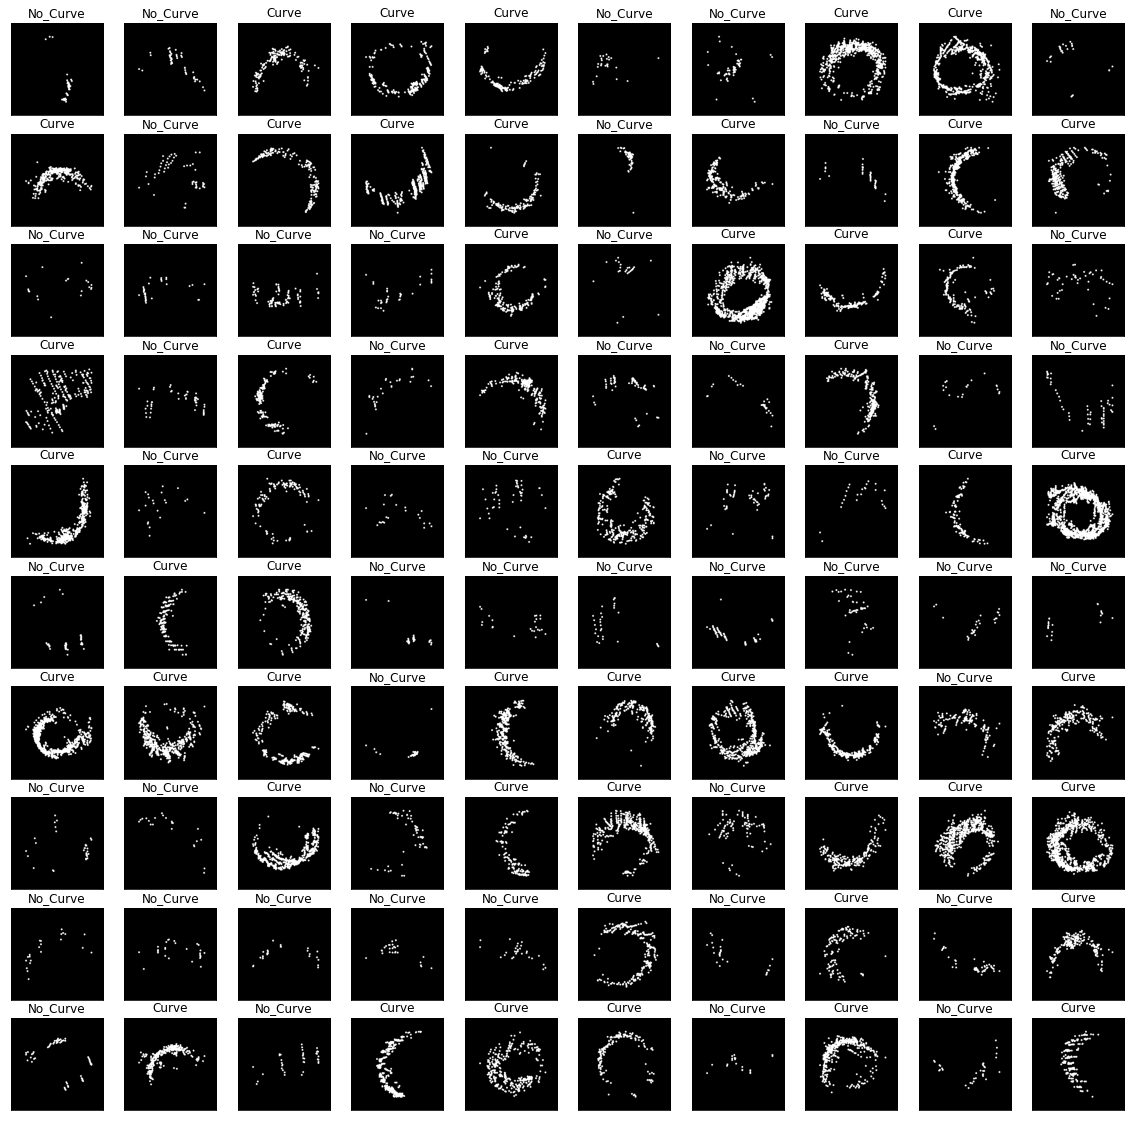

In [227]:
fig = plt.figure(figsize=(20, 20))

k = 0
for img  in test_image:
    
    y = fig.add_subplot(10,10,k+1)
    k += 1
    data = img.reshape(1,256,256,1)
    model_out = model.predict([data])
    
    
    if np.argmax(model_out) == 1:
        str_label = "Curve"
    else:
        str_label = "No_Curve"
    
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)